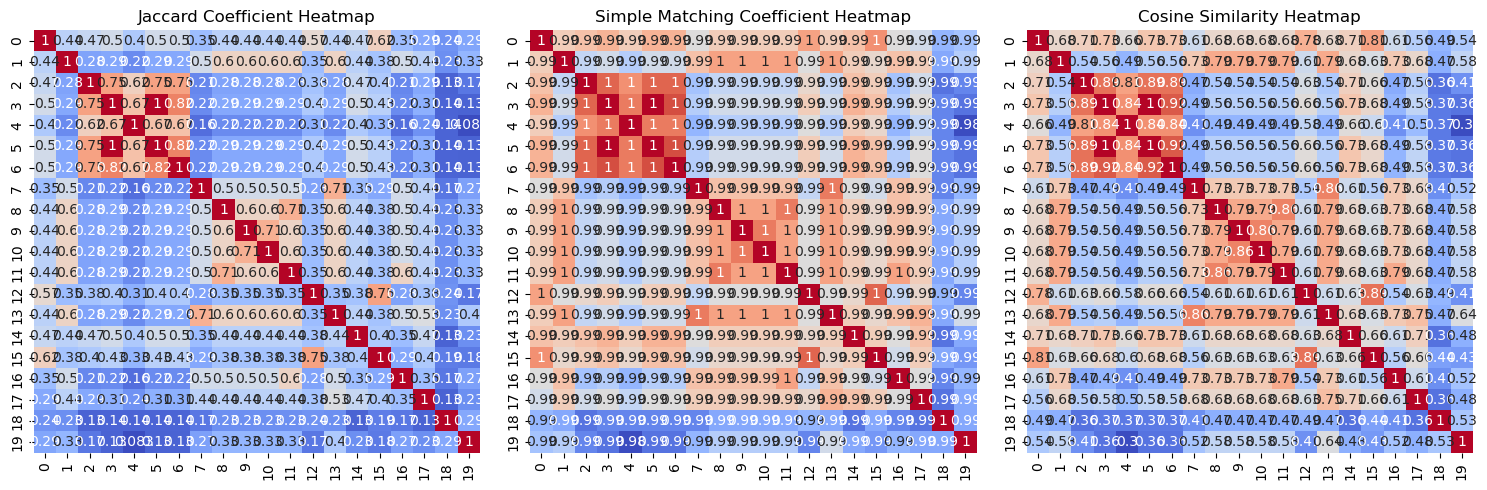

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI', usecols='A:AE')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_binary = pd.get_dummies(df, drop_first=True)
df_20 = df_binary.iloc[:20]
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

# Calculate similarities
for i in range(20):
    for j in range(20):
        vec1 = df_20.iloc[i]
        vec2 = df_20.iloc[j]
        
        f11 = sum((vec1 == 1) & (vec2 == 1))
        f10 = sum((vec1 == 1) & (vec2 == 0))
        f01 = sum((vec1 == 0) & (vec2 == 1))
        f00 = sum((vec1 == 0) & (vec2 == 0))
        
        jc_matrix[i, j] = f11 / (f11 + f10 + f01)
        smc_matrix[i, j] = (f11 + f00) / (f11 + f10 + f01 + f00)
        cosine_matrix[i, j] = cosine_similarity([vec1], [vec2])[0][0]

# Plot heatmaps
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Simple Matching Coefficient Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()